In [19]:
import matplotlib.pyplot as plt
import numpy as np

In [20]:
img = np.array([
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 9, 9, 9, 0, 0],
    [0, 0, 9, 9, 9, 0, 0],
    [0, 0, 9, 9, 9, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0]
], dtype=np.int64)

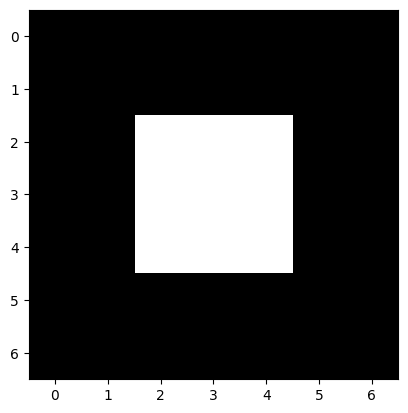

In [21]:
plt.imshow(img, cmap="gray")

In [22]:
k = 4


def box_sum(img: np.ndarray, k: int) -> np.ndarray:
    ii = img.cumsum(axis=0).cumsum(axis=1)
    ii = np.pad(ii, ((1, 0), (1, 0)), mode="constant")

    return ii[k:, k:] - ii[:-k, k:] - ii[k:, :-k] + ii[:-k, :-k]


def blur(img: np.ndarray, k: int) -> np.ndarray:
    pad_amount_total = k - 1
    q, r = divmod(pad_amount_total, 2)
    pad_left_top = q + r
    pad_right_bottom = q
    img_pad = np.pad(img, ((pad_left_top, pad_right_bottom), (pad_left_top, pad_right_bottom)), mode="reflect")
    box_summed = box_sum(img_pad, k)
    result = box_summed / (k**2)
    result_u8 = np.clip(result, 0, 255).round().astype(np.uint8)

    return result_u8

In [23]:
blur(img, k)

array([[1, 1, 1, 2, 2, 1, 1],
       [1, 1, 1, 2, 2, 1, 1],
       [1, 1, 2, 3, 3, 2, 1],
       [2, 2, 3, 5, 5, 3, 2],
       [2, 2, 3, 5, 5, 3, 2],
       [1, 1, 2, 3, 3, 2, 1],
       [1, 1, 1, 2, 2, 1, 1]], dtype=uint8)

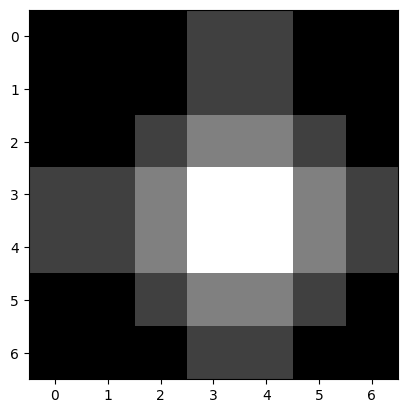

In [24]:
plt.imshow(blur(img, k), cmap="gray")